In [1]:
import re
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
# read dataset
dataset = pd.read_csv('dataset/train.csv')

In [3]:
# exploring dataset
dataset.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [4]:
# exploring dataset
dataset.shape

(20800, 5)

In [5]:
# exploring dataset
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
# check for null values
dataset.isnull()
dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
# replace the null values with empty string
dataset = dataset.fillna('')
dataset.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
# merging the author, title and text
dataset['news'] = dataset['author'] + ' ' + dataset['title'] + ' ' + dataset['text']

In [9]:
df = pd.DataFrame(dataset['news'])

In [10]:
df['label'] = dataset['label']
train_data = df['news'].values
target = dataset['label'].values

In [11]:
df.head()

,news,label
0,Darrell Lucus House Dem Aide: We Didn’t Even S...,1
1,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...",0
2,Consortiumnews.com Why the Truth Might Get You...,1
3,Jessica Purkiss 15 Civilians Killed In Single ...,1
4,Howard Portnoy Iranian woman jailed for fictio...,1


In [12]:
# converting textual data into numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(train_data)

TfidfVectorizer()

In [13]:
train_data = vectorizer.transform(train_data)

In [14]:
# splitting the dataset to training and test
X_train, X_test, Y_train, Y_test = train_test_split(train_data, target, test_size = 0.2, stratify=target, random_state=2)

Logistic Regression Model

In [15]:
# training the model: Logoistic Regression Model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [16]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy Score: ', training_data_accuracy)

Accuracy Score:  0.9778245192307692


In [17]:
# accuracy score on testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy Score: ', testing_data_accuracy)

Accuracy Score:  0.9540865384615385


[[8110  200]
 [ 169 8161]]


E:\Ismt\AI\FakeNews\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


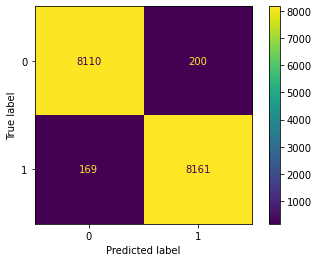

In [18]:
# confusion matrix on training data
confusion_matrix_score_train = confusion_matrix(Y_train, X_train_prediction)
print(confusion_matrix_score_train)
plot_confusion_matrix(model, X_train, Y_train)

[[1990   87]
 [ 104 1979]]


E:\Ismt\AI\FakeNews\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


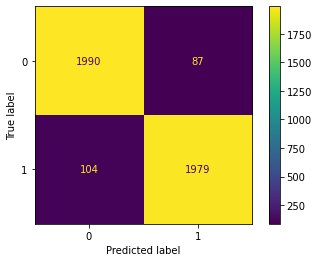

In [19]:
# confusion matrix on testing data
confusion_matrix_score_test = confusion_matrix(Y_test, X_test_prediction)
print(confusion_matrix_score_test)
plot_confusion_matrix(model, X_test, Y_test)

In [20]:
# precision and recall score on training data
precision_score_train = precision_score(Y_train, X_train_prediction)
recall_score_train = recall_score(Y_train, X_train_prediction)
print("Precision Score on training data: ", precision_score_train)
print("Recall Score on training data: ", recall_score_train)

Precision Score on training data:  0.9760794163377586
Recall Score on training data:  0.9797118847539016


In [21]:
# precision and recall score on testing data
precision_score_test = precision_score(Y_test, X_test_prediction)
recall_score_test = recall_score(Y_test, X_test_prediction)
print("Precision Score on testing data: ", precision_score_train)
print("Recall Score on testing data: ", recall_score_train)

Precision Score on testing data:  0.9760794163377586
Recall Score on testing data:  0.9797118847539016


In [22]:
# classification report on training data
classification_report_train = classification_report(Y_train,X_train_prediction)
print("Classification Report on training data: \n", classification_report_train)

Classification Report on training data: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      8310
           1       0.98      0.98      0.98      8330

    accuracy                           0.98     16640
   macro avg       0.98      0.98      0.98     16640
weighted avg       0.98      0.98      0.98     16640



In [23]:
# classification report on testing data
classification_report_test = classification_report(Y_test,X_test_prediction)
print("Classification Report on training data: \n", classification_report_test)

Classification Report on training data: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      2077
           1       0.96      0.95      0.95      2083

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160



In [24]:
# prediction
X_new = X_test[7]

prediction = model.predict(X_new)
print(prediction)

if(prediction[0]==0):
    print('The news is Real')
else:
    print('The news is Fake')

[0]
The news is Real


Support Vector Classification (SVC)

In [25]:
# training the model: SVC
svc_model = SVC()
svc_model.fit(X_train, Y_train)

SVC()

In [26]:
# accuracy score on training data for SVC
X_train_prediction_svc = svc_model.predict(X_train)
training_data_accuracy_svc = accuracy_score(X_train_prediction_svc, Y_train)
print('Accuracy Score: ', training_data_accuracy_svc)

Accuracy Score:  0.9984375


In [27]:
# accuracy score on training data for SVC
X_test_prediction_svc = svc_model.predict(X_test)
testing_data_accuracy_svc = accuracy_score(X_test_prediction_svc, Y_test)
print('Accuracy Score: ', testing_data_accuracy_svc)

Accuracy Score:  0.9697115384615385


[[8294   16]
 [  10 8320]]


E:\Ismt\AI\FakeNews\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


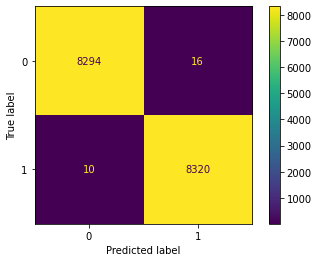

In [28]:
# confusion matrix on training data
confusion_matrix_score_train_svc = confusion_matrix(Y_train, X_train_prediction_svc)
print(confusion_matrix_score_train_svc)
plot_confusion_matrix(svc_model, X_train, Y_train)

[[2019   58]
 [  68 2015]]


E:\Ismt\AI\FakeNews\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


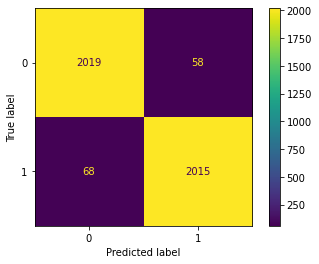

In [29]:
# confusion matrix on testing data
confusion_matrix_score_test_svc = confusion_matrix(Y_test, X_test_prediction_svc)
print(confusion_matrix_score_test_svc)
plot_confusion_matrix(svc_model, X_test, Y_test)

In [30]:
# precision and recall score on training data
precision_score_train_svc = precision_score(Y_train, X_train_prediction_svc)
recall_score_train_svc = recall_score(Y_train, X_train_prediction_svc)
print("Precision Score on training data: ", precision_score_train_svc)
print("Recall Score on training data: ", recall_score_train_svc)

Precision Score on training data:  0.9980806142034548
Recall Score on training data:  0.9987995198079231


In [31]:
# precision and recall score on testing data
precision_score_test_svc = precision_score(Y_test, X_test_prediction_svc)
recall_score_test_svc = recall_score(Y_test, X_test_prediction_svc)
print("Precision Score on testing data: ", precision_score_test_svc)
print("Recall Score on testing data: ", recall_score_test_svc)

Precision Score on testing data:  0.9720212252773758
Recall Score on testing data:  0.9673547767642823


In [32]:
# classification report on training data
classification_report_train_svc = classification_report(Y_train,X_train_prediction_svc)
print("Classification Report on training data: \n", classification_report_train_svc)

Classification Report on training data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8310
           1       1.00      1.00      1.00      8330

    accuracy                           1.00     16640
   macro avg       1.00      1.00      1.00     16640
weighted avg       1.00      1.00      1.00     16640



In [33]:
# classification report on testing data
classification_report_test_svc = classification_report(Y_test,X_test_prediction_svc)
print("Classification Report on training data: \n", classification_report_test_svc)

Classification Report on training data: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2077
           1       0.97      0.97      0.97      2083

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



In [34]:
# prediction
X_new = X_test[0]

prediction = svc_model.predict(X_new)
print(prediction)

if(prediction[0]==0):
    print('The news is Real')
else:
    print('The news is Fake')

[1]
The news is Fake


MultinomialNB

In [35]:
# training the model: MultinomialNB
naive_model = MultinomialNB()
naive_model.fit(X_train, Y_train)

MultinomialNB()

In [36]:
# accuracy score on training data for SVC
X_train_prediction_naive = naive_model.predict(X_train)
training_data_accuracy_naive = accuracy_score(X_train_prediction_naive, Y_train)
print('Accuracy Score: ', training_data_accuracy_naive)

Accuracy Score:  0.8837740384615385


In [37]:
# accuracy score on testing data for SVC
X_test_prediction_naive = naive_model.predict(X_test)
testing_data_accuracy_naive = accuracy_score(X_test_prediction_naive, Y_test)
print('Accuracy Score: ', testing_data_accuracy_naive)

Accuracy Score:  0.8463942307692308


[[8290   20]
 [1914 6416]]


E:\Ismt\AI\FakeNews\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


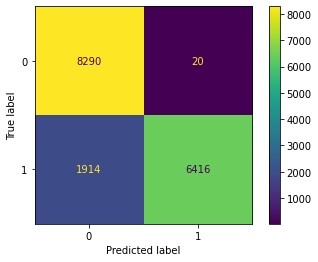

In [38]:
# confusion matrix on training data
confusion_matrix_score_train_naive = confusion_matrix(Y_train, X_train_prediction_naive)
print(confusion_matrix_score_train_naive)
plot_confusion_matrix(naive_model, X_train, Y_train)

[[2068    9]
 [ 630 1453]]


E:\Ismt\AI\FakeNews\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


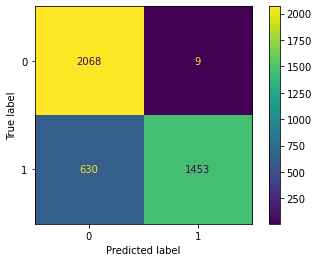

In [39]:
# confusion matrix on testing data
confusion_matrix_score_test_naive = confusion_matrix(Y_test, X_test_prediction_naive)
print(confusion_matrix_score_test_naive)
plot_confusion_matrix(naive_model, X_test, Y_test)

In [40]:
# precision and recall score on training data
precision_score_train_naive = precision_score(Y_train, X_train_prediction_naive)
recall_score_train_naive = recall_score(Y_train, X_train_prediction_naive)
print("Precision Score on training data: ", precision_score_train_naive)
print("Recall Score on training data: ", recall_score_train_naive)

Precision Score on training data:  0.9968924798011187
Recall Score on training data:  0.7702280912364946


In [41]:
# precision and recall score on testing data
precision_score_test_naive = precision_score(Y_test, X_test_prediction_naive)
recall_score_test_naive = recall_score(Y_test, X_test_prediction_naive)
print("Precision Score on testing data: ", precision_score_test_naive)
print("Recall Score on testing data: ", recall_score_test_naive)

Precision Score on testing data:  0.993844049247606
Recall Score on testing data:  0.6975516082573212


In [42]:
# classification report on training data
classification_report_train_naive = classification_report(Y_train,X_train_prediction_naive)
print("Classification Report on training data: \n", classification_report_train_naive)

Classification Report on training data: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90      8310
           1       1.00      0.77      0.87      8330

    accuracy                           0.88     16640
   macro avg       0.90      0.88      0.88     16640
weighted avg       0.90      0.88      0.88     16640



In [43]:
# classification report on testing data
classification_report_test_naive = classification_report(Y_test,X_test_prediction_naive)
print("Classification Report on training data: \n", classification_report_test_naive)

Classification Report on training data: 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      2077
           1       0.99      0.70      0.82      2083

    accuracy                           0.85      4160
   macro avg       0.88      0.85      0.84      4160
weighted avg       0.88      0.85      0.84      4160



In [44]:
# prediction
X_new = X_test[3]

prediction = naive_model.predict(X_new)
print(prediction)

if(prediction[0]==0):
    print('The news is Real')
else:
    print('The news is Fake')

[0]
The news is Real
